# Predict whether the client has subscribed a term deposit or not as a response to telemarketing campaign

Attribute information For bank dataset

   Input variables:
   ## Bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
  
   8 - loan: has personal loan? (binary: "yes","no")
   
   ## Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
   
   10 - day: last contact day of the month (numeric)
   
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   12 - duration: last contact duration, in seconds (numeric)
   
   ## Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
 
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")



  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None



In [44]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#load dataset
data=pd.read_csv('bank-full.csv', delimiter=';')
data 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [46]:
data.shape 

(45211, 17)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [48]:
# descriptive analysis of numerical features
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [49]:
data.isnull().sum().sum()

0

In [50]:
data.duplicated().sum()

0

No missing values, No duplicate entries

## Visualisation

Categorical Variables -> Bar chart

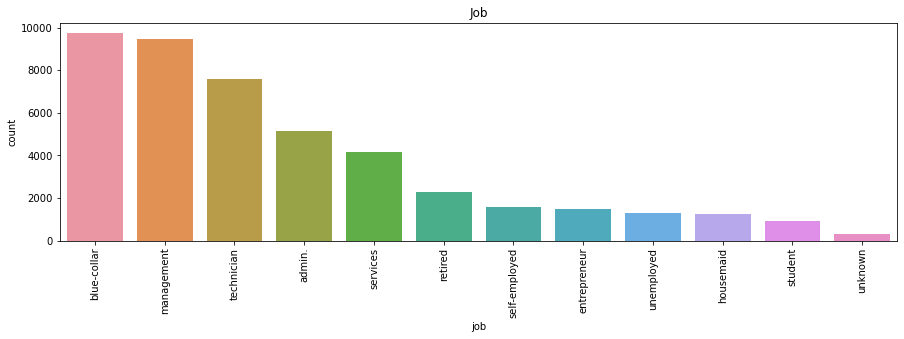

In [51]:
plt.figure(figsize=(15,4))
sns.countplot(x='job',  order= data.job.value_counts().index , orient='v',  data= data )
plt.xticks(rotation=90)
plt.title('Job')
plt.show()

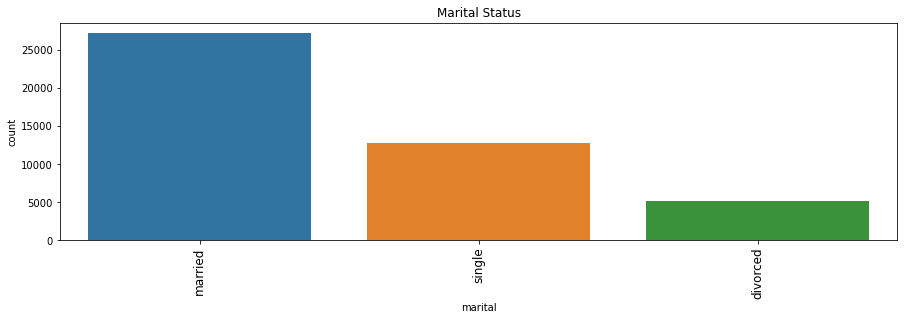

In [52]:
plt.figure(figsize=(15,4))
sns.countplot(x='marital',  order= data.marital.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Marital Status')
plt.show()

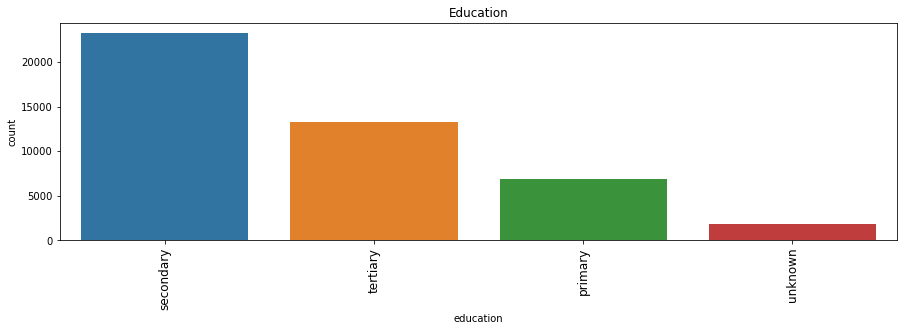

In [53]:
plt.figure(figsize=(15,4))
sns.countplot(x='education',  order= data.education.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Education')
plt.show()

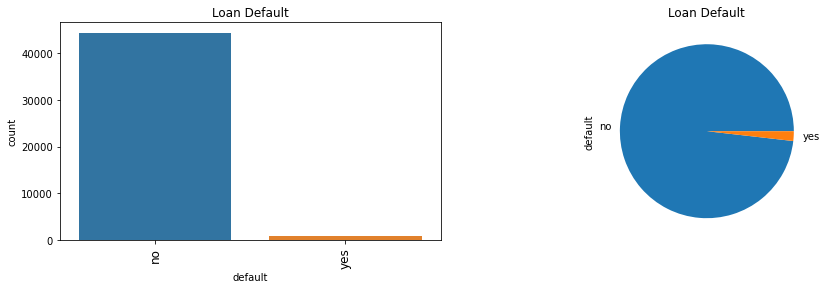

In [54]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x='default',  order= data.default.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Loan Default')

plt.subplot(1,2,2)
data.default.value_counts().plot(kind='pie')
plt.title('Loan Default')

plt.show() 

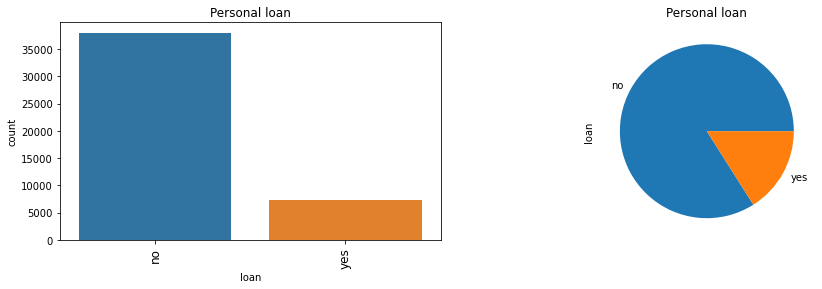

In [55]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x='loan',  order= data.loan.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Personal loan')

plt.subplot(1,2,2)
data.loan.value_counts().plot(kind='pie')
plt.title('Personal loan')

plt.show() 

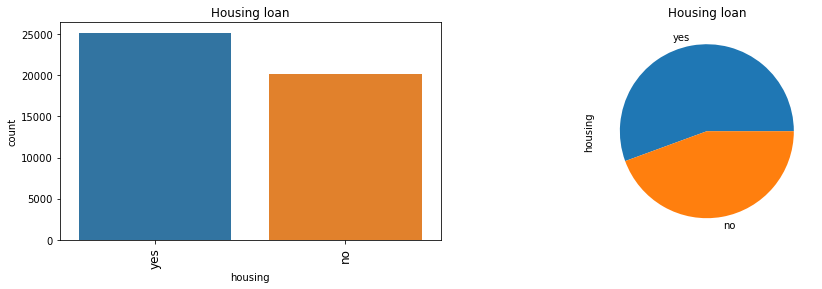

In [56]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x='housing',  order= data.housing.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Housing loan')

plt.subplot(1,2,2)
data.housing.value_counts().plot(kind='pie')
plt.title('Housing loan')

plt.show() 

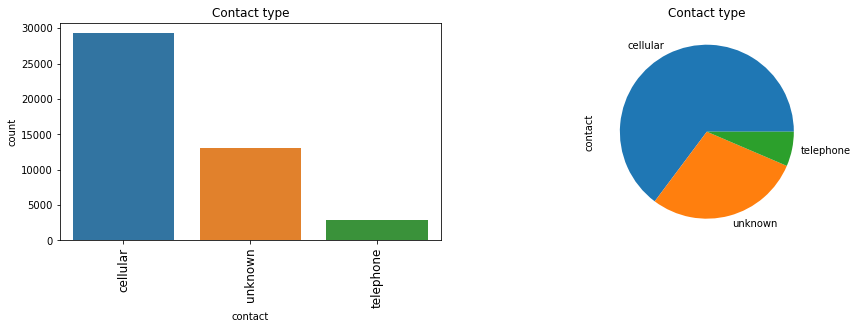

In [57]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x='contact',  order= data.contact.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Contact type')

plt.subplot(1,2,2)
data.contact.value_counts().plot(kind='pie')
plt.title('Contact type')

plt.show() 

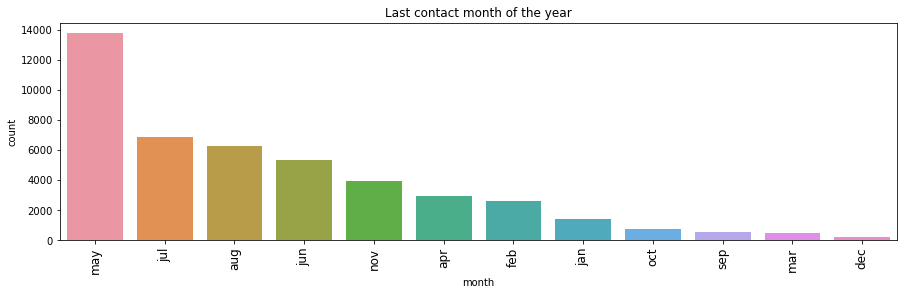

In [58]:
plt.figure(figsize=(15,4))
sns.countplot(x='month',  order= data.month.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Last contact month of the year')
plt.show() 

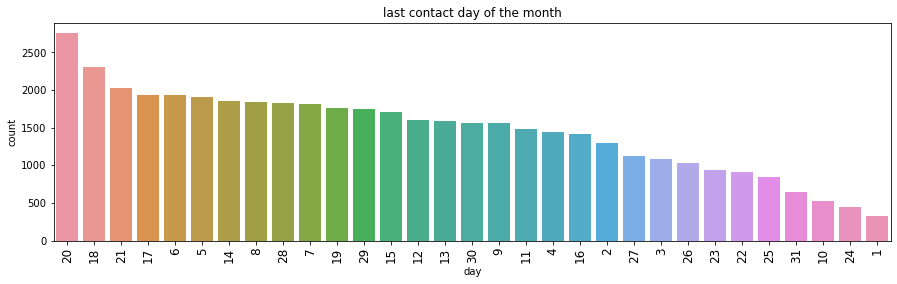

In [59]:
plt.figure(figsize=(15,4))
sns.countplot(x='day',  order= data.day.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('last contact day of the month')
plt.show() 

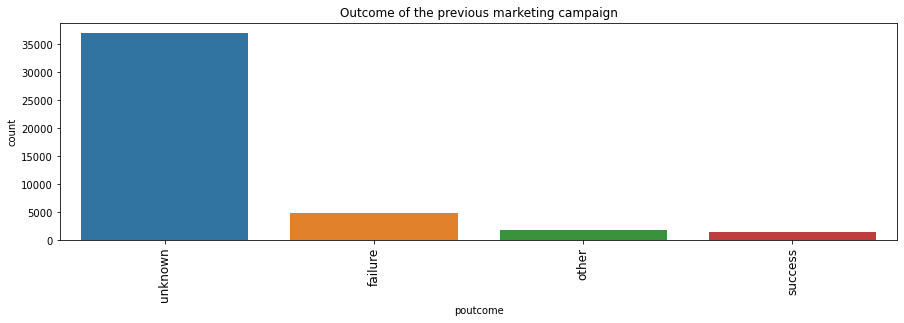

In [60]:
plt.figure(figsize=(15,4))
sns.countplot(x='poutcome',  order= data.poutcome.value_counts().index , data= data )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Outcome of the previous marketing campaign')
plt.show() 

Continuous Variable -> Histogram and Boxplot 

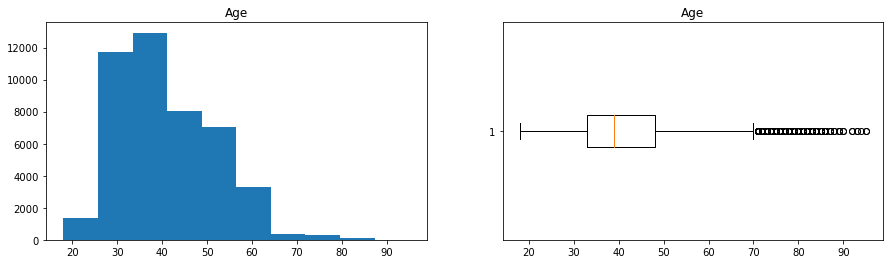

In [61]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(data.age)
plt.title('Age')

plt.subplot(1,2,2)
plt.boxplot(data.age, vert=False) 
plt.title('Age')

plt.show()

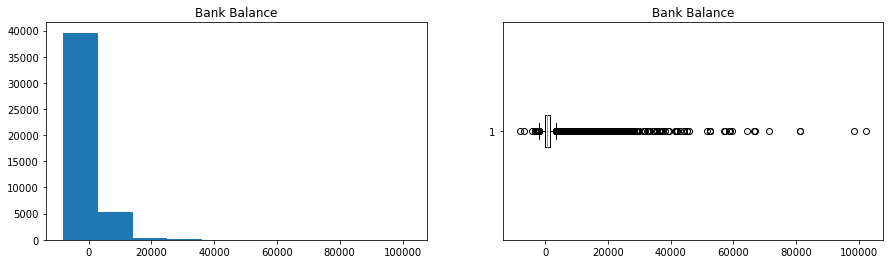

In [62]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(data.balance)
plt.title('Bank Balance')

plt.subplot(1,2,2)
plt.boxplot(data.balance, vert=False) 
plt.title('Bank Balance')

plt.show()

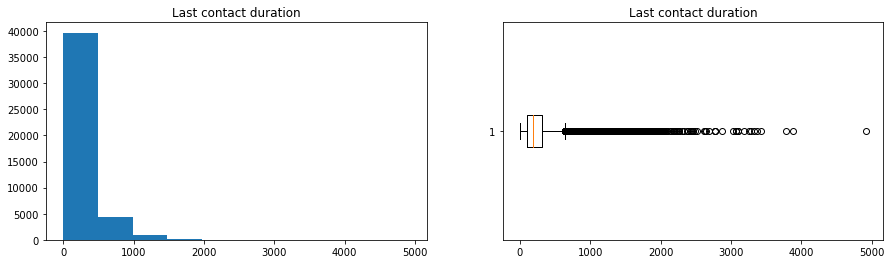

In [63]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(data.duration)
plt.title('Last contact duration')

plt.subplot(1,2,2)
plt.boxplot(data.duration, vert=False) 
plt.title('Last contact duration')

plt.show()

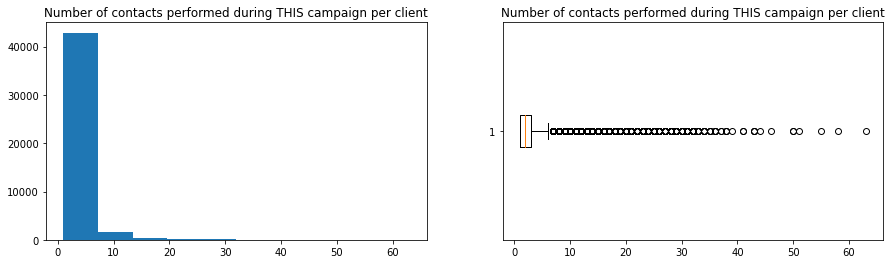

In [64]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(data.campaign)
plt.title('Number of contacts performed during THIS campaign per client')

plt.subplot(1,2,2)
plt.boxplot(data.campaign, vert=False) 
plt.title('Number of contacts performed during THIS campaign per client')

plt.show()

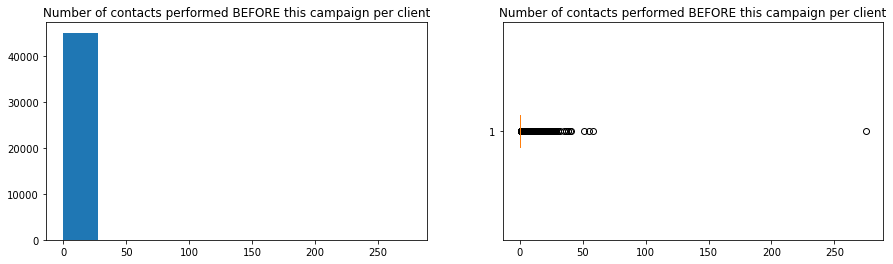

In [65]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(data.previous)
plt.title('Number of contacts performed BEFORE this campaign per client')

plt.subplot(1,2,2)
plt.boxplot(data.previous, vert=False) 
plt.title('Number of contacts performed BEFORE this campaign per client')

plt.show()

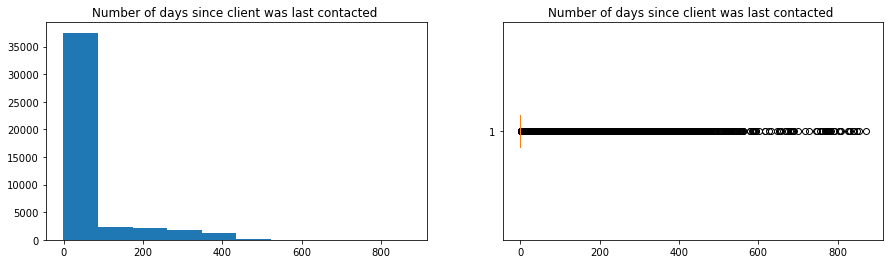

In [66]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(data.pdays)
plt.title('Number of days since client was last contacted ')

plt.subplot(1,2,2)
plt.boxplot(data.pdays, vert=False) 
plt.title('Number of days since client was last contacted ')

plt.show()

There are huge number of outliers so we can not remove them as it would result in loss of data

## Univariate Analysis

In [67]:
#Dataframe of those who subscried term deposit
df_yes = data.loc[data['y'] == 'yes'] 
df_yes.shape 

(5289, 17)

In [68]:
#Dataframe of those who did subscried term deposit
df_no = data.loc[data['y'] == 'no'] 
df_no.shape 

(39922, 17)

Categorical Variables

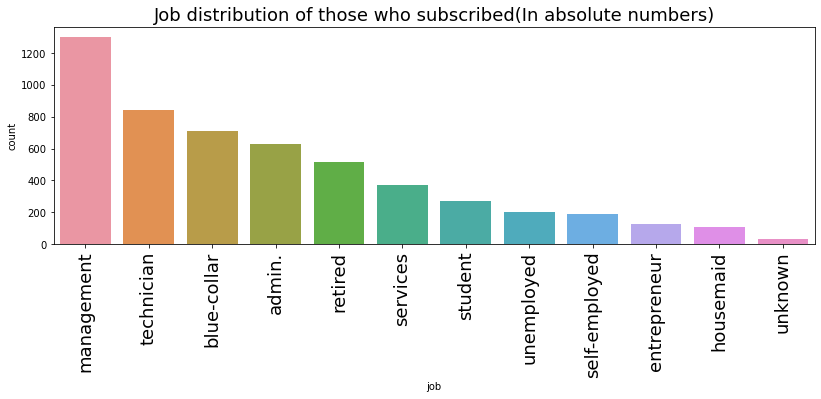

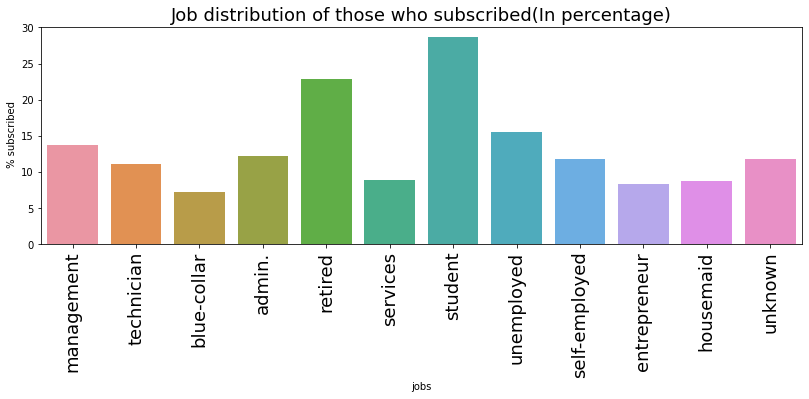

In [69]:
plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
sns.countplot(x='job',  order= df_yes.job.value_counts().index, data= df_yes )
plt.xticks(rotation=90, fontsize= 18)
plt.title('Job distribution of those who subscribed(In absolute numbers)', fontsize= 18)
plt.show() 

d = pd.crosstab( data.job , data.y )
d_job = pd.DataFrame()
d_job['jobs'] = ['admin.','blue-collar','entrepreneur','housemaid','management', 'retired', 'self-employed','services',
                 'student','technician' ,'unemployed' , 'unknown' ]
pc_job=[]

for i in range (0,12):
    pc_job.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_job['pc_job'] = pc_job

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='jobs', y= pc_job , order= df_yes.job.value_counts().index, data=d_job)
plt.title('Job distribution of those who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(rotation=90, fontsize= 18)
plt.show() 
# Management is @ 12% which means out of 100 management customers only 12% subscribed 

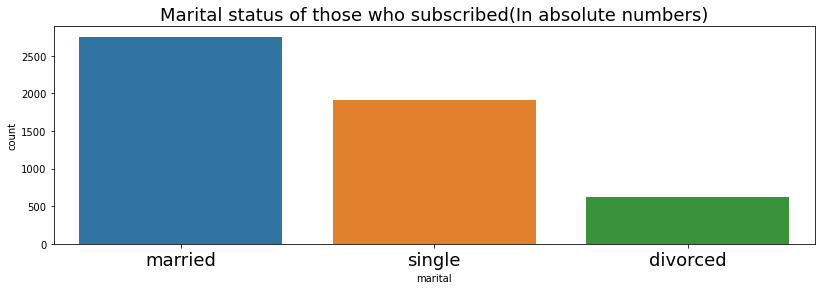

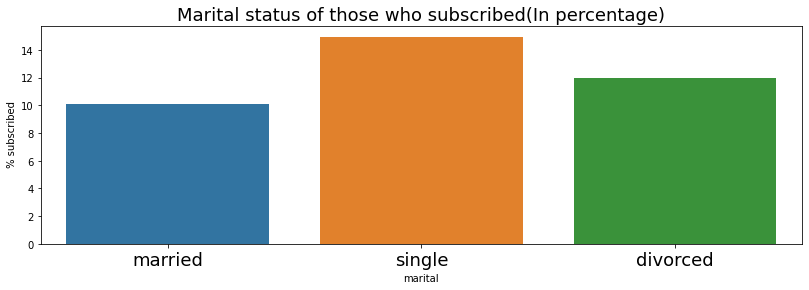

In [70]:
plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
sns.countplot(x='marital',  order= df_yes.marital.value_counts().index , data= df_yes )
plt.xticks(fontsize= 18)
plt.title('Marital status of those who subscribed(In absolute numbers)', fontsize= 18)
plt.show() 

d = pd.crosstab( data.marital , data.y )

d_marital = pd.DataFrame()
d_marital['marital'] = ['divorced' , 'married' , 'single']

pc_marital=[]

for i in range (0,len(d_marital.marital)):
    pc_marital.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_marital['pc_marital'] = pc_marital

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='marital', y= pc_marital , order=df_yes.marital.value_counts().index , data=d_marital)
plt.title('Marital status of those who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 
# single is @ 14 % which means out of 100 single customers 14% subscribed 

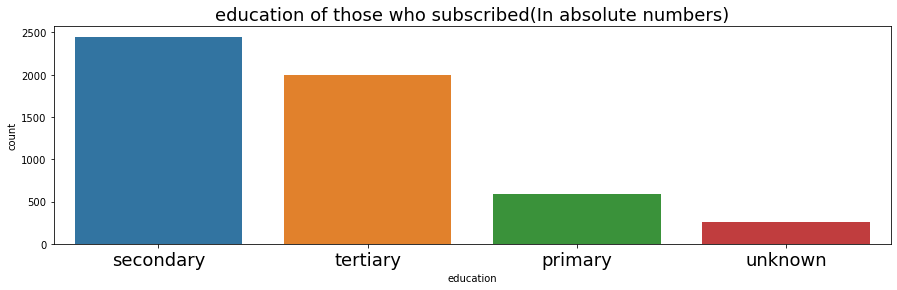

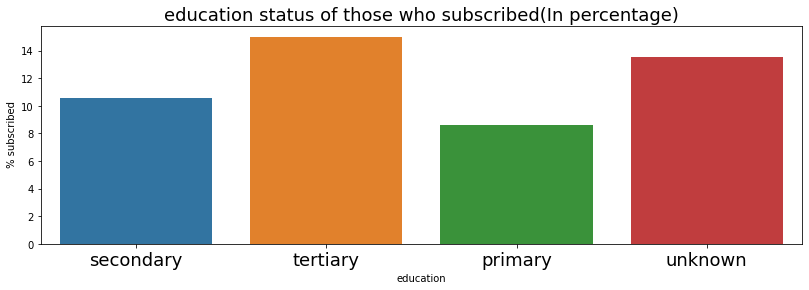

In [71]:
plt.figure(figsize=(15,4))
sns.countplot(x='education',  order= df_yes.education.value_counts().index , data= df_yes )
plt.xticks(fontsize= 18)
plt.title('education of those who subscribed(In absolute numbers)', fontsize= 18)
plt.show() 

d = pd.crosstab( data.education , data.y )

d_education = pd.DataFrame()
d_education['education'] = ['primary', 'secondary', 'tertiary' , 'unknown'] 

pc_education=[]

for i in range (0,len(d_education.education)):
    pc_education.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_education['pc_education'] = pc_education

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='education', y= pc_education ,  order= df_yes.education.value_counts().index , data=d_education)
plt.title('education status of those who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 
# secondary is @ 11 % which means out of 100 secondary educated customers 14% subscribed 

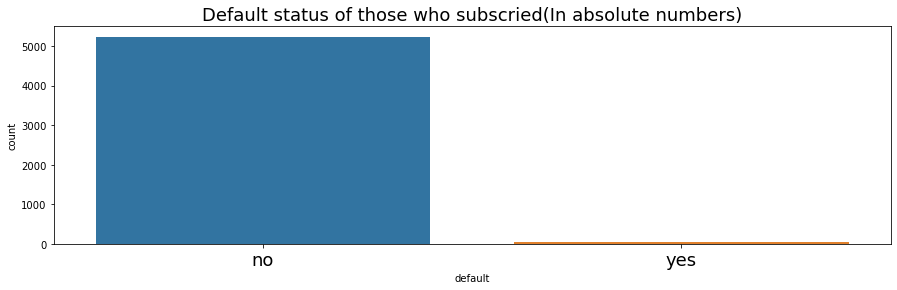

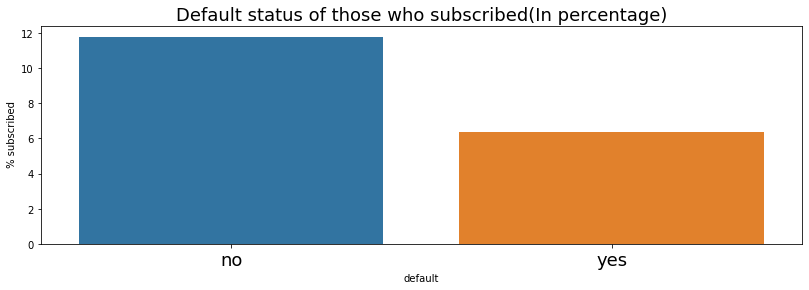

In [72]:
plt.figure(figsize=(15,4))
sns.countplot(x='default',  order= df_yes.default.value_counts().index , data= df_yes )
plt.xticks(fontsize= 18)
plt.title('Default status of those who subscried(In absolute numbers)', fontsize= 18)
plt.show() 

d = pd.crosstab( data.default , data.y )

d_default = pd.DataFrame()
d_default['default'] = ['no' , 'yes'] 

pc_default=[]

for i in range (0,len(d_default.default)):
    pc_default.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_default['pc_default'] = pc_default

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='default', y= pc_default ,  order= df_yes.default.value_counts().index , data=d_default)
plt.title('Default status of those who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 

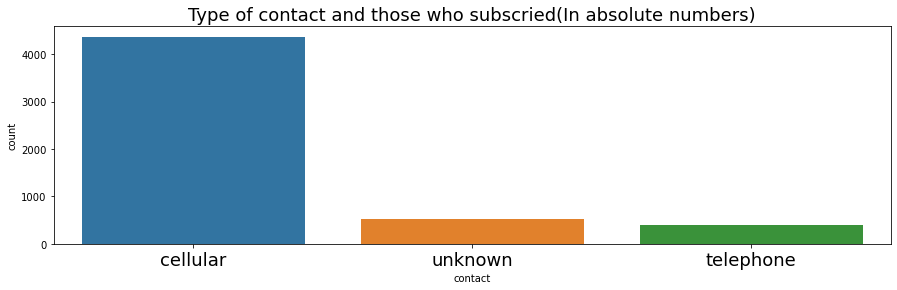

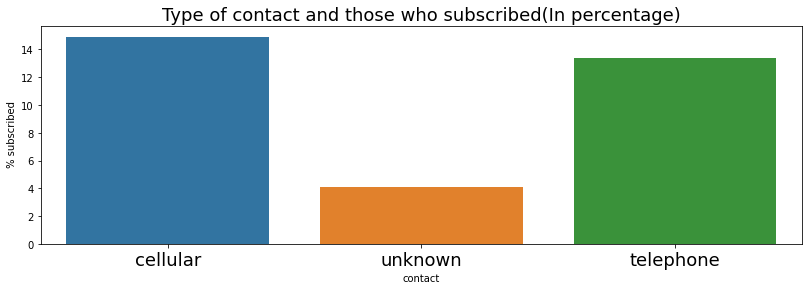

In [73]:
plt.figure(figsize=(15,4))
sns.countplot(x='contact',  order= df_yes.contact.value_counts().index , data= df_yes )
plt.xticks(fontsize= 18)
plt.title('Type of contact and those who subscried(In absolute numbers)',fontsize= 18)
plt.show() 

d = pd.crosstab( data.contact , data.y )

d_contact = pd.DataFrame()
d_contact['contact'] = ['cellular', 'telephone', 'unknown'] 

pc_contact=[]

for i in range (0,len(d_contact.contact)):
    pc_contact.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_contact['pc_contact'] = pc_contact

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='contact', y= pc_contact ,  order= df_yes.contact.value_counts().index , data=d_contact)
plt.title('Type of contact and those who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 
# cellular is 14% means out of 100 customers contacted on cellular device, 14 subscribed

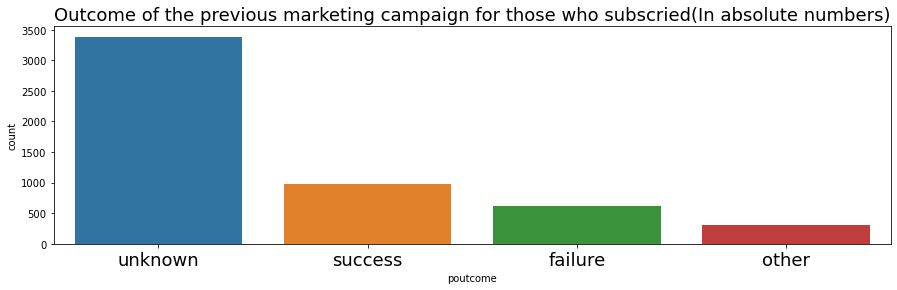

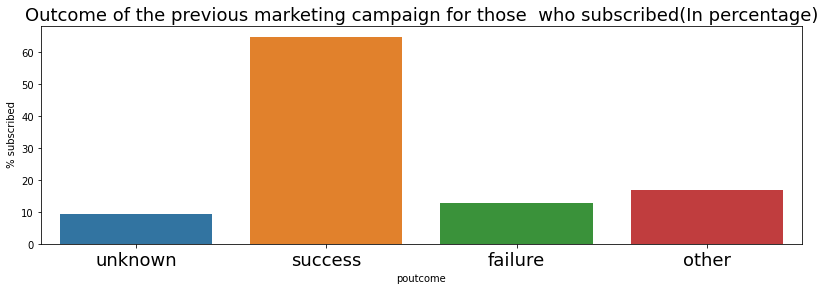

In [74]:
plt.figure(figsize=(15,4))
sns.countplot(x='poutcome',  order= df_yes.poutcome.value_counts().index , data= df_yes )
plt.xticks(fontsize= 18)
plt.title('Outcome of the previous marketing campaign for those who subscried(In absolute numbers)',fontsize= 18)
plt.show() 

d = pd.crosstab( data.poutcome , data.y )

d_poutcome = pd.DataFrame()
d_poutcome['poutcome'] = ['failure' , 'other' , 'success' , 'unknown'] 

pc_poutcome=[]

for i in range (0,len(d_poutcome.poutcome)):
    pc_poutcome.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_poutcome['pc_poutcome'] = pc_poutcome

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='poutcome', y= pc_poutcome ,  order= df_yes.poutcome.value_counts().index , data=d_poutcome)
plt.title('Outcome of the previous marketing campaign for those  who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 

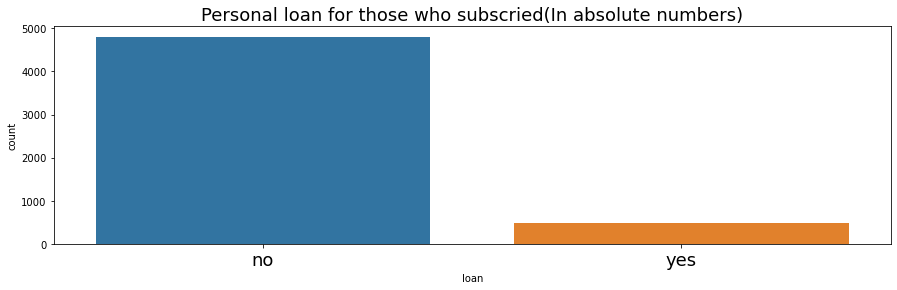

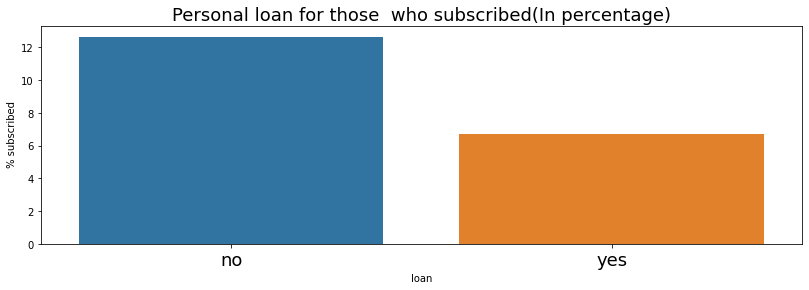

In [75]:
plt.figure(figsize=(15,4))
sns.countplot(x='loan',  order= df_yes.loan.value_counts().index , data= df_yes )
plt.xticks(fontsize= 18)
plt.title('Personal loan for those who subscried(In absolute numbers)', fontsize= 18)
plt.show() 

d = pd.crosstab( data.loan , data.y )

d_loan = pd.DataFrame()
d_loan['loan'] = ['no' , 'yes'] 

pc_loan=[]

for i in range (0,len(d_loan.loan)):
    pc_loan.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_loan['pc_loan'] = pc_loan

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='loan', y= pc_loan ,  order= df_yes.loan.value_counts().index , data=d_loan)
plt.title('Personal loan for those  who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 
#Out of 100 customers not having personal loans, 12% subscribed

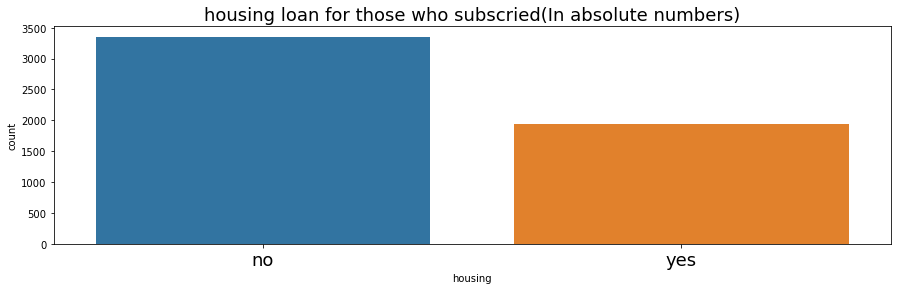

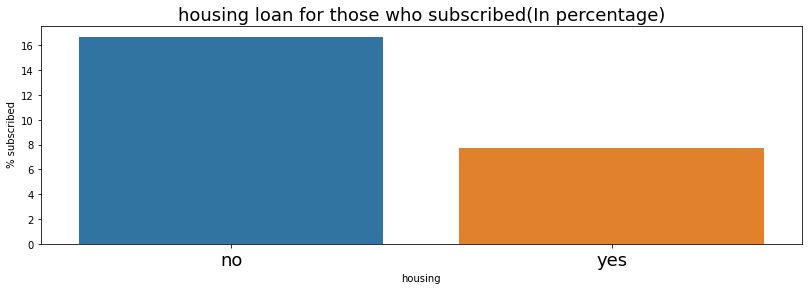

In [76]:
plt.figure(figsize=(15,4))
sns.countplot(x='housing',  order= df_yes.housing.value_counts().index , data= df_yes )
plt.xticks(fontsize= 18)
plt.title('housing loan for those who subscried(In absolute numbers)', fontsize= 18)
plt.show() 

d = pd.crosstab( data.housing , data.y )

d_housing = pd.DataFrame()
d_housing['housing'] = ['no' , 'yes'] 

pc_housing=[]

for i in range (0,len(d_housing.housing)):
    pc_housing.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_housing['pc_housing'] = pc_housing

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='housing', y= pc_housing ,  order= df_yes.housing.value_counts().index , data=d_housing)
plt.title('housing loan for those who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 
#Out of 100 customers not having housing loans, 16% subscribed

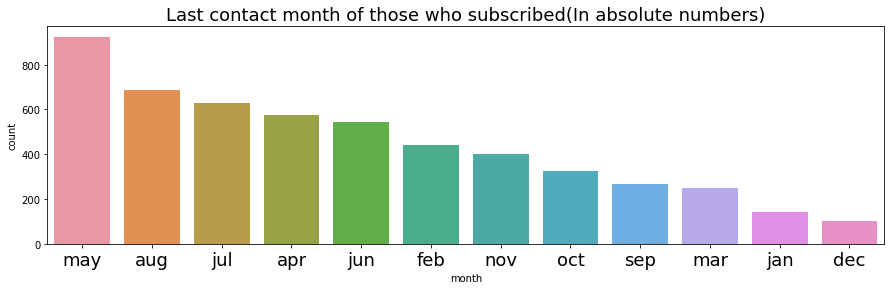

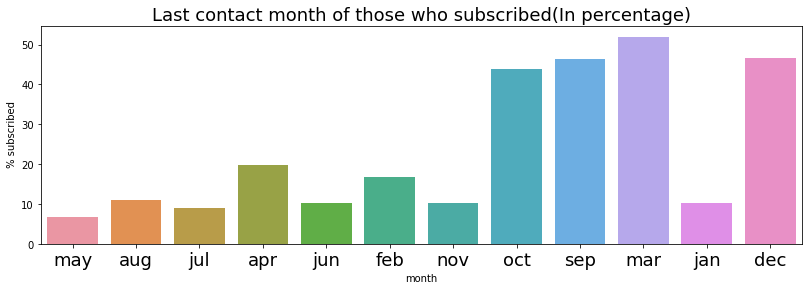

In [77]:
plt.figure(figsize=(15,4))
sns.countplot(x='month',  order= df_yes.month.value_counts().index , data= df_yes)
plt.xticks(fontsize= 18)
plt.title('Last contact month of those who subscribed(In absolute numbers)', fontsize= 18)
plt.show() 

d = pd.crosstab( data.month , data.y )

d_month = pd.DataFrame()
d_month['month'] = ['apr', 'aug', 'dec', 'feb' , 'jan' , 'jul' , 'jun' , 'mar' , 'may' , 'nov' , 'oct' , 'sep'] 

pc_month=[]

for i in range (0,len(d_month.month)):
    pc_month.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_month['pc_month'] = pc_month

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='month', y= pc_month ,  order= df_yes.month.value_counts().index , data=d_month)
plt.title('Last contact month of those who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 
#Out of 100 customers last contacted in march, 50% subscribed

Continuos Variables

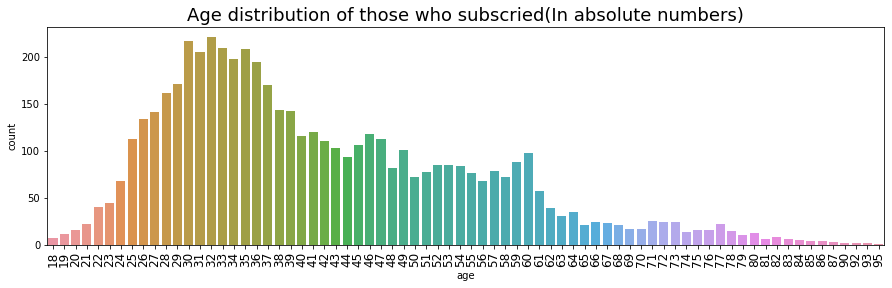

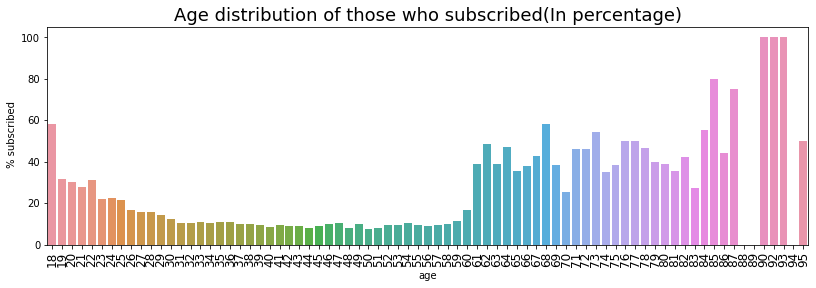

In [78]:
plt.figure(figsize=(15,4))
sns.countplot(x='age', data= df_yes )
plt.xticks(rotation=90, fontsize= 12)
plt.title('Age distribution of those who subscried(In absolute numbers)',fontsize= 18)
plt.show()

d = pd.crosstab( data.age , data.y )

list= np.arange(18,96).tolist()
list.remove(91)# age 91 not present in data

d_age = pd.DataFrame()
d_age['age'] = list 

pc_age=[]

for i in d_age.age:
    pc_age.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_age['pc_age'] = pc_age

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='age', y= pc_age , data=d_age)
plt.title('Age distribution of those who subscribed(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(rotation=90, fontsize= 12)
plt.show()

In [79]:
Balance=[]

for i in range (0,len(data.balance)):
    
    if data.balance[i] <= 0:
        Balance.append('No balance')
         
    elif (data.balance[i]> 0 and data.balance[i]<=1000):
        Balance.append('Low balance')

    elif (data.balance[i]> 1000 and data.balance[i]<=5000):
         Balance.append('Average balance')
    
    elif data.balance[i] > 5000:
        Balance.append("High balance") 

In [80]:
data['Balance'] = Balance

df_yes = data.loc[data['y'] == 'yes'] 
df_yes.shape 

(5289, 18)

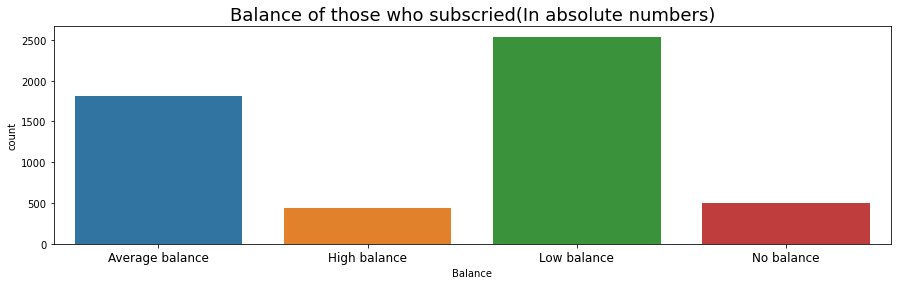

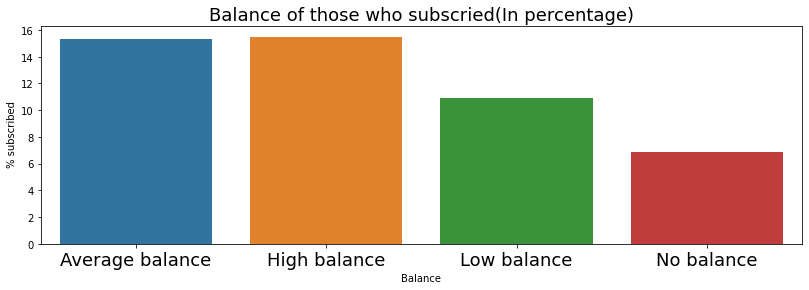

In [81]:
plt.figure(figsize=(15,4))
sns.countplot(x='Balance',order=['Average balance' , 'High balance' , 'Low balance' , 'No balance'], data= df_yes )
plt.xticks(fontsize= 12)
plt.title('Balance of those who subscried(In absolute numbers)',fontsize= 18)
plt.show() 

d = pd.crosstab( data.Balance , data.y )

d_Balance = pd.DataFrame()
d_Balance['Balance'] = ['Average balance' , 'High balance' , 'Low balance' , 'No balance']

pc_Balance=[]

for i in range (0,len(d_Balance.Balance)):
    pc_Balance.append(d['yes'][i] * 100 /(d['no'][i] + d['yes'][i])) 
    
d_Balance['pc_Balance'] = pc_Balance

plt.figure(figsize=(30,4))
plt.subplot(1,2,2)
sns.barplot(x='Balance', y= pc_Balance ,   data=d_Balance)
plt.title('Balance of those who subscried(In percentage)', fontsize= 18 ) 
plt.ylabel(' % subscribed')
plt.xticks(fontsize= 18)
plt.show() 
#Out of 100 customers with average balance, 15% subscribed

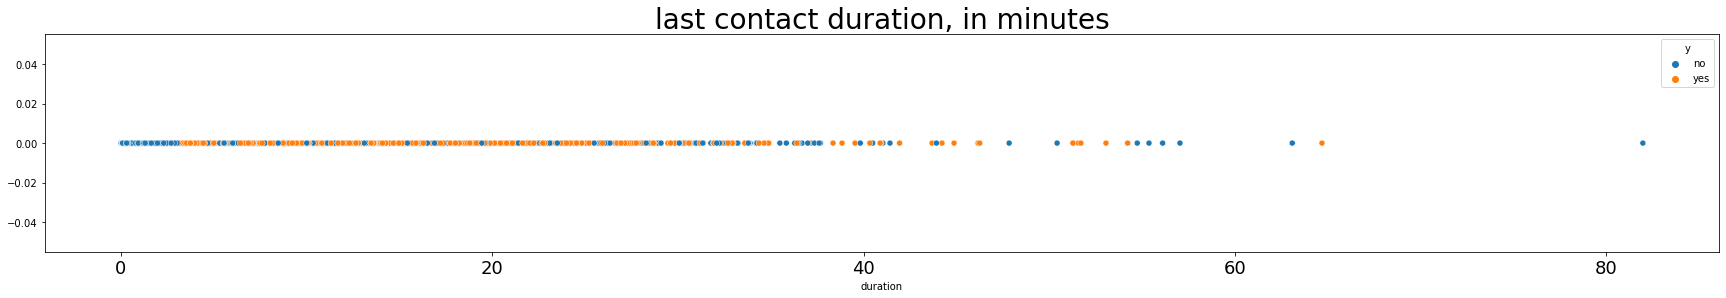

In [82]:
plt.figure(figsize=(30,4))
sns.scatterplot(x=(data.duration/60) , y=np.zeros_like(len(data.duration)) , hue=data.y) 
plt.title('last contact duration, in minutes', fontsize=28) 
plt.xticks(fontsize=18) 
plt.show()

## Bivariate Analysis

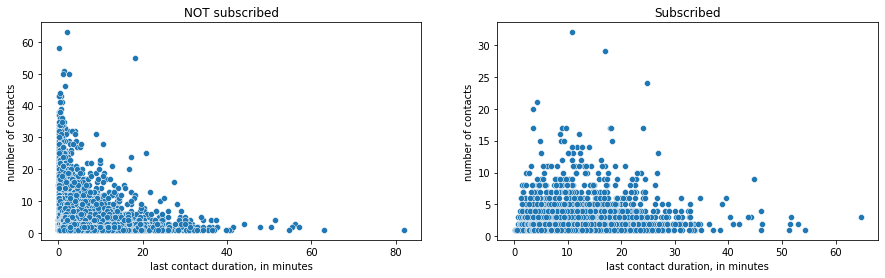

In [83]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot( x=(df_no.duration/60) , y=df_no.campaign) 
plt.title('NOT subscribed')
plt.xlabel('last contact duration, in minutes')
plt.ylabel('number of contacts')

plt.subplot(1,2,2)
sns.scatterplot( x=(df_yes.duration/60) , y=df_yes.campaign )
plt.title('Subscribed')
plt.xlabel('last contact duration, in minutes')
plt.ylabel('number of contacts')

plt.show()

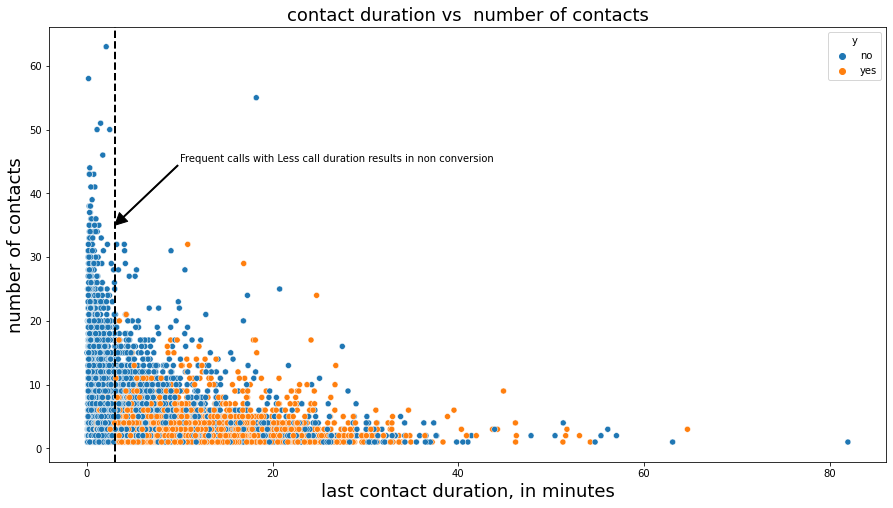

In [84]:
plt.figure(figsize=(15,8))

sns.scatterplot( x=(data.duration/60) , y=data.campaign, hue=data.y, ) 

plt.title('contact duration vs  number of contacts', fontsize=18) 
plt.xlabel('last contact duration, in minutes', fontsize= 18)
plt.ylabel('number of contacts', fontsize= 18) 

plt.axvline(x=3, linewidth=2, color="k", linestyle='--' )
plt.annotate("Frequent calls with Less call duration results in non conversion",xytext = (10,45),
             arrowprops=dict(color = 'k', width=1),xy=(3,35))

plt.show() 

Insights: 

Students and retired personnel are more likely to subscribe term deposit.

Married customers are less likely to subscribe as compared to singles.

Tertiary educated customers are more likely to subscribe, though in absolute numbers more subscribers are secondary educated. 

Those customers who have no credit default, no personal loan, no housing loan are more likely to subscribe.

conversion ration(call to subscription) is good in march, sept, oct, dec. More calls can fetch more subscriptions.
Months of april, may, june, july, aug have more subscriptions in terms of absolute numbers but at the cost of thousands of calls made. So cost to benefit ratio is poor. 

Focus on age group 20 to 40 (more subscriptions in absolute terms) and age group +60 (more conversion ration) 

Customers with either average or high balance tend to subscribe to term deposit.

Avoid more than 10 calls which may annoy customer. Avoid calls with duration less than 3 min. 
Focus on having less than 10 calls with more time duration. 

## Model Building 

In [85]:
# segregation of dataset into input and output variables
X = data.iloc[:,0:16]
Y = data.iloc[:,16]

In [86]:
#Converting categorical variables into numbers 
X= pd.get_dummies(X)

In [87]:
# Encode labels in column 'Y'.

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y= pd.DataFrame(label_encoder.fit_transform(Y))

In [88]:
#Logistic regression and fit the model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [89]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [90]:
y_pred_df= pd.DataFrame()

In [91]:
y_pred_df['Actual'] = Y
y_pred_df['Predicted'] = y_pred

In [92]:
y_pred_df 

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


[[39185   737]
 [ 4173  1116]]


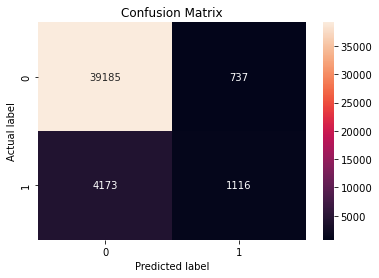

In [93]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

sns.heatmap(confusion_matrix, annot=True, fmt='d' )
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()

True Positive: when the model correctly predicts the positive class(Having subscription) (1116)

True Negative: when the model correctly predicts the negative class(Not having subscription)(39185)

False Positive: when the model incorrectly predicts the positive class (737)

False Negative: when the model incorrectly predicts the negative class (4173)

Precision: When a positive value is predicted, how often is the prediction correct? 

Precision = TP / (TP + FP) = 1116/(1116+ 737 ) = 0.6022

Sensitivity / True Positive Rate / Recall:

Recall: When the actual value is positive, how often is the prediction correct?

Recall = TP / (FN + TP) = 1116 / (4173+1116) = 0.2110

f1-score is the weighted harmonic mean of precision and recall. Its value ranges from 0 to 1. 

f1 score = 2*((precision*recall)/(precision+recall)) = 2 * 0.6022 * 0.2110 / (0.6022+0.2110) = 0.3125

In [94]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Precision of 0 includes all those instances predicted as no subscription, and  clients that actually said no, which is 90% 

Recall of 0 includes all those clients that actually declined subscription and the model predicts correctly that they would decline the subscription, which is 98% 

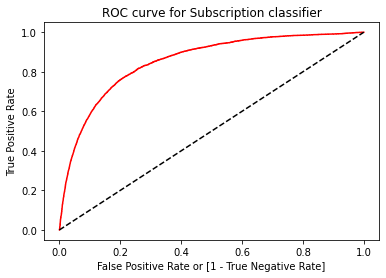

In [95]:
# ROC Curve plotting and finding AUC value

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [96]:
print('AUC-ROC Score:',auc)

AUC-ROC Score: 0.5962714857784364


The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. 

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

## Model Validation 

In [97]:
# Evaluate using a train and a test set
from sklearn.model_selection import train_test_split

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

model = LogisticRegression(max_iter=400)
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)

# Model.score automates the prediction of your data using X_test and compares it with Y_test and by default uses the R-squared metric 

In [98]:
result*100 

90.07372654155496

In [99]:
y_test_pred= model.predict(X_test)

In [100]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13202
           1       0.63      0.34      0.44      1718

    accuracy                           0.90     14920
   macro avg       0.77      0.66      0.69     14920
weighted avg       0.89      0.90      0.89     14920



 Accuracy of model is 90% which is an indicator of a good model. 
 
 precision, recall and f1 score is very good for predicting those who will not subscribe to term deposit and these metrics are have average performance in predicting those who will subscribe to term deposit. This discrepency is because of the skewed data which have a lot of 'not subscribers' and very few subscribers. As a result model gets biased in favour of predicting not subscribers

# Thank You 